Project 3-2

In [1]:
using Pkg
Pkg.add("Images")
Pkg.add("TestImages")
Pkg.add("ImageIO")
Pkg.add("QuartzImageIO")
Pkg.add("ImageMagick")
Pkg.add("ImageView")

   Updating registry at `C:\Users\theve\.julia\registries\General`
  Resolving package versions...
  Installed ImageShow ──────────────────── v0.2.3
  Installed AxisAlgorithms ─────────────── v1.0.0
  Installed Images ─────────────────────── v0.23.1
  Installed SentinelArrays ─────────────── v1.2.16
  Installed Observables ────────────────── v0.3.2
  Installed OffsetArrays ───────────────── v1.4.0
  Installed CategoricalArrays ──────────── v0.8.3
  Installed ColorSchemes ───────────────── v3.10.1
  Installed ImageMetadata ──────────────── v0.9.4
  Installed RangeArrays ────────────────── v0.3.2
  Installed Showoff ────────────────────── v0.3.2
  Installed Parsers ────────────────────── v1.0.12
  Installed MacroTools ─────────────────── v0.5.6
  Installed Distances ──────────────────── v0.9.2
  Installed NearestNeighbors ───────────── v0.4.7
  Installed AbstractFFTs ───────────────── v0.5.0
  Installed Adapt ──────────────────────── v2.3.0
  Installed EllipsisNotation ───────────── v0.4

Part A

In [8]:
function cbf(n,k,t)
  if k==0
    return 1/sqrt(n)
  else
    return sqrt(2/n)*cos(k*(2t+1)*pi/(2n))
  end
end

function dctcomp(B,l)
  m,n=size(B)
  a=Int(floor(m/8))
  b=Int(floor(n/8))
  
  C=[cbf(8,i,j) for i=0:7, j=0:7]
  
  Mask=[i+j<l for i=1:8, j=1:8]
  
  M=zeros(m,n)
  for i=1:a, j=1:b
    rows=(8i-7):8i
    cols=(8j-7):8j
    X=B[rows,cols]
    Y=C*X*C'
    Y2=Y.*Mask
    X2=C'*Y2*C
    M[rows,cols]=X2
  end
  
    println("Space saved: ", 100(1-sum(Mask)/64), "%")
    println("Average error: ", norm(B-M)/(m*n))
  
  return M
  

  
end


dctcomp (generic function with 1 method)

In [4]:
using Images, TestImages, ImageView, LinearAlgebra


Space saved: 95.3125%
Average error: 0.010877185467527318


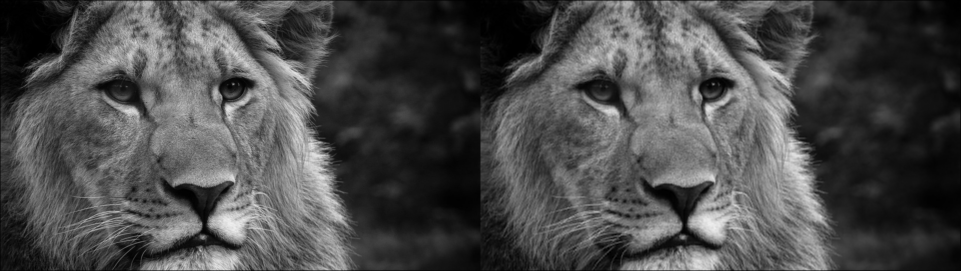

In [15]:
img=load("lion.jpg")
img=Gray.(img)
A=channelview(img)
n,m=size(A)
O=ones(n,m)

B=255*A-127*O

l=4
C=dctcomp(B,l)
D=(C+127*O)/255

img2=colorview(Gray,D)

mosaicview(img, img2, nrow=1)








Part B

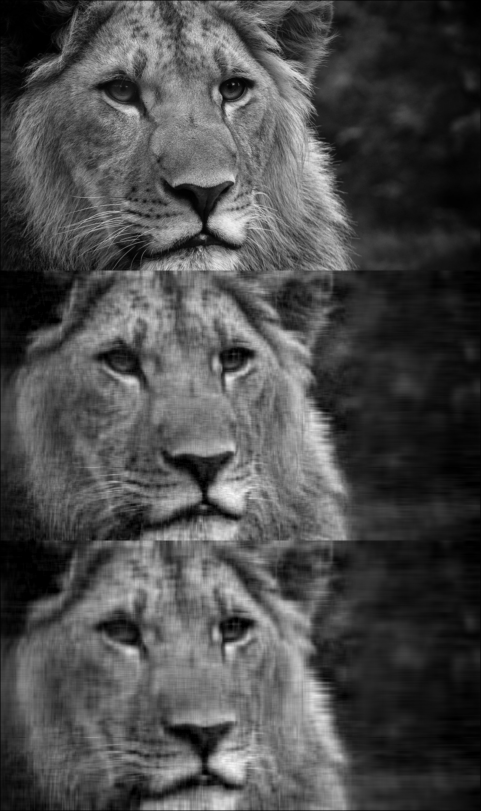

In [16]:
img=load("lion.jpg")
img=Gray.(img)
A=channelview(img)
rank(A)
U,S,V=svd(A)
k=30
A2=U[:,1:k]*diagm(S)[1:k,1:k]*V[:,1:k]'
img2=colorview(Gray,A2)

k=20
A3=U[:,1:k]*diagm(S)[1:k,1:k]*V[:,1:k]'
img3=colorview(Gray,A3)

mosaicview(img, img2, img3, rnum=1)